In [2]:
# Imports
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization, Input
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model


In [3]:
convert = {0:"Fresh Apples",1:"Fresh Banana",2:"Fresh Oranges",
          3:"Rotten Apples",4:"Rotten Banana",5:"Rotten Oranges"}

In [4]:
batch_size = 32
num_classes = 6
epochs = 50

In [5]:
def one_hot_encode(image, label):
    label = tf.keras.utils.to_categorical(label, num_classes)
    return image, label

In [5]:
data_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'

image_size = (300,300) 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.


In [8]:
model = Sequential()

model.add(Input((300,300,3))) 

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [59]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

In [60]:
model.fit(train_ds, validation_data=val_ds,epochs =epochs, verbose=1,callbacks = callbacks)

# Saving the Model
model.save(os.path.join('models','best_model.h5'))

Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4041 - loss: 3.3573
Epoch 1: val_loss improved from inf to 0.98328, saving model to best_model.keras
273/273 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.4044 - loss: 3.3515 - val_accuracy: 0.6794 - val_loss: 0.9833
Epoch 2/50
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5985 - loss: 1.0275
Epoch 2: val_loss improved from 0.98328 to 0.78626, saving model to best_model.keras
273/273 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.5986 - loss: 1.0272 - val_accuracy: 0.7156 - val_loss: 0.7863
Epoch 3/50
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6559 - loss: 0.8694
Epoch 3: val_loss improved from 0.78626 to 0.68745, saving model to best_model.keras
273/273 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.6560 - loss: 0.8693 - val_accuracy: 0.7115 - val_loss: 0.6875
Epoch 4/50
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6940 - loss: 0.7593
Epoch 4: val_loss improved from 0.68745 to 

In [6]:
test_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(300, 300),
    batch_size=32
)

test_ds = test_ds.map(one_hot_encode)

Found 2698 files belonging to 6 classes.


In [7]:
# Load the model
loaded_model = load_model('/kaggle/input/ripe-and-rotten-detection-v2/keras/v2/1/Model_2.h5')

In [11]:
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9573 - loss: 0.1493
Test Accuracy: 95.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
Predicted class: Rotten Banana


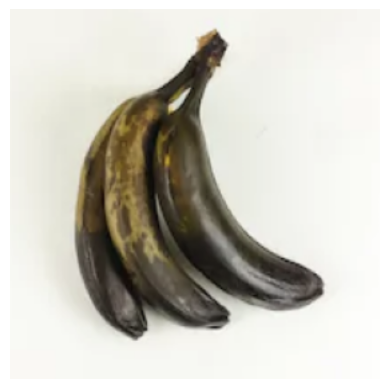

In [9]:
img = cv2.imread("/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.58.43 PM.png")
resized_image = cv2.resize(img, (300,300), interpolation=cv2.INTER_LINEAR)
im2arr = np.array(resized_image)
im2arr = np.expand_dims(im2arr, axis=0)

resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_image)
plt.axis("Off")

pred = loaded_model.predict(im2arr)
predicted_classes = np.argmax(pred, axis=1)
predicted_class = predicted_classes[0]
print(f"Predicted class: {convert[predicted_class]}")


In [12]:
!pip install gtts

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [16]:
from gtts import gTTS

tts = gTTS(text=convert[predicted_class], lang='en')
audio_path = "/kaggle/working/output.mp3"
tts.save(audio_path)
print(f"Generated speech for: {convert[predicted_class]}")

Generated speech for: Rotten Banana
